In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [2]:
df1 = pd.read_csv("data/tanzania_wells.csv", index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'data/tanzania_wells.csv'

In [ ]:
df1.head()

#mapping grade map
grade_map = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}

#adding in to train_kch
train_kch['grade_num'] = train_kch['grade'].map(grade_map)
train_kch.drop('grade', axis = 1, inplace=True);

# Finding what features to include / drop

Dropping: 
    date_recorded (This is not helpful because this is the date that the data was entered. Metadata) 
    wpt_name (Geographic information. Useful for qualitative analysis. Not useful for modeling, but could be useful in future steps.) 
    num_private (No information in the data dictionary, and not interpretable from looking at it.)
    region_code (Removing as we don't know how these are coded.)
    district_code (Removing as we do not know where these locations are.)
    public_meeting (Dropping. Data documentation is unclear on what this is and further investigation is required.)
    recorded_by (No insights to be gained from this.)
    scheme_name (Dropping due to excessive categorical data. Not useful for analysis.)
    extraction_type (Dropping in exchange for extraction_type_class.)
    extraction_type_group (Dropping in exchange for extraction_type_class.)
    management_group (Dropping for management as this one does not have a better breakdown of managers of the wells.)
    payment (Dropping this one for payment type as these category names are less clear.)
    water_quality (Dropping because it doesn't consolidate the categories as much as water_quality)
    quantity_group (Dropping over quantity group as they are duplicates.)
    source (Dropping because too much information.)
    source_class (Dropping because there is too little information.)
    waterpoint_type_group (Dropping for waterpoint_type.)

In [ ]:
df1['amount_tsh'].value_counts()

In [ ]:
df1['date_recorded'].value_counts()

In [ ]:
df1['funder'].value_counts()

In [ ]:
df1['gps_height'].value_counts()

In [ ]:
df1['installer'].value_counts()

In [ ]:
# Geographic information. Not useful for modeling, but could be useful in future steps.
df1['wpt_name'].value_counts()

In [ ]:
# No information in the data dictionary, and not interpretable from looking at it.
df1['num_private'].value_counts()

In [ ]:
# Easily mappable
df1['basin'].value_counts()

In [ ]:
# Might not put in the model, but keeping for further analysis
df1['subvillage'].value_counts()

In [ ]:
# Keeping so we can map it and understand the values
df1['region'].value_counts()

In [ ]:
# Removing as we don't know how these are coded
df1['region_code'].value_counts()

In [ ]:
# Removing as we do not know where these locations are.
df1['district_code'].value_counts()

In [ ]:
# Not needed for modeling purposes, but could be useful for mapping later on.
df1['lga'].value_counts()

In [ ]:
# Not needed for modeling purposes, but could be useful for mapping later on.
df1['ward'].value_counts()

In [ ]:
# Population is a good indicator for supply vs demand.
df1['population'].value_counts()

In [ ]:
# Dropping. Data documentation is unclear on what this is and further investigation is required.
df1['public_meeting'].value_counts()

In [ ]:
# No insights to be gained from this.
df1['recorded_by'].value_counts()

In [ ]:
# Dropping for management
df1['scheme_management'].value_counts()

In [ ]:
# Dropping due to excessive categorical data. Not useful for analysis.
df1['scheme_name'].value_counts()

In [ ]:
# Keeping to see if there is a relationship between permits and functional wells.
df1['permit'].value_counts()

In [ ]:
# Keeping for potential imputation
df1['construction_year'].value_counts()

In [ ]:
# Dropping in exchange for extraction_type_class
df1['extraction_type'].value_counts()

In [ ]:
# Dropping in exchange for extraction_type_class
df1['extraction_type_group'].value_counts()

In [ ]:
# Keeping this extraction type as it has the most consolidated categories and easier mapping capabilities.
df1['extraction_type_class'].value_counts()

In [ ]:
# Keeping this one as it has a better breakdown of managers of the wells
df1['management'].value_counts()

In [ ]:
# Dropping for management as this one does not have a better breakdown of managers of the wells.
df1['management_group'].value_counts()

In [ ]:
# Dropping this one for payment type as these category names are less clear.
df1['payment'].value_counts()

In [ ]:
# Keeping this one as category names are more clear.
df1['payment_type'].value_counts()

In [ ]:
# Dropping because it doesn't consolidate the categories as much as water_quality
df1['water_quality'].value_counts()

In [ ]:
# Keeping because it consolidates the categories a bit more than water_quality
df1['quality_group'].value_counts()

In [ ]:
# Keeping over quantity group as they are duplicates
df1['quantity'].value_counts()

In [ ]:
# Dropping over quantity group as they are duplicates
df1['quantity_group'].value_counts()

In [ ]:
# Too much information
df1['source'].value_counts()

In [ ]:
# Goldilocks
df1['source_type'].value_counts()

In [ ]:
# Not enough information
df1['source_class'].value_counts()

In [ ]:
# Keeping the split over merging communal pipe and multiple.
df1['waterpoint_type'].value_counts()

In [ ]:
# Dropping for waterpoint_type
df1['waterpoint_type_group'].value_counts()

In [ ]:
# Coppying and Dropping columns we do not wish to make features from.
df2 = df1.copy()
df2.drop(inplace = True, columns = ['scheme_name', 'date_recorded', 'wpt_name', 'num_private', 'region_code', 'district_code', 
                    'public_meeting', 'recorded_by', 'extraction_type', 'extraction_type_group', 'management_group', 
                    'payment', 'water_quality', 'quantity_group', 'source', 'source_class', 'waterpoint_type_group',
                    'scheme_management'])

# EDA

In [ ]:
# Numeration of our target status group
status_group_map = {'functional': 0, 'non functional': 1, 'functional needs repair': 2}
df1['status_group_num'] = df1['status_group'].map(status_group_map)

In [ ]:
#Checking for any correlations on the initial data set
plt.figure(figsize=(15,20))
sns.heatmap(df1.corr().abs(), annot=True)
plt.show()

In [ ]:
df2['status_group'].value_counts(normalize=True)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr().abs(), annot=True)
plt.show()

In [ ]:
#Lat-Long heat map based on GPS Height
fig,ax = plt.subplots() 
plt.style.use('seaborn') 
sns.set_context('talk') 
df1.plot(kind = 'scatter',x = 'longitude', y = 'latitude', alpha = 0.2 , c = 'gps_height', cmap=plt.get_cmap('jet'), colorbar = True, vmin = 0, vmax = 2000, figsize = (15,7),ax=ax); 
ax.grid(False) 
ax.set_facecolor('White') 
ax.set_xlabel('Longitude') 
ax.set_ylabel('Latitude') 
ax.set_title('Water Wells in Tanzania'); 
plt.tight_layout()

In [ ]:
# Looking at entry errors on longitude. Looks like there are a few might be missing?
df2['longitude'].value_counts()

In [ ]:
# Heatmap 
plt.figure(figsize=(15,20))
sns.heatmap(df1.corr().abs(), annot=True)
plt.show()

In [ ]:
# Looks like population might be missing information?
pd.crosstab(df1['population'], df1['status_group'])

## Mapping categorical values to numeric categorical values.

In [ ]:
# Numeration of our target status group
status_group_map = {'functional': 0, 'non functional': 1, 'functional needs repair': 2}
df2['status_group_num'] = df2['status_group'].map(status_group_map)

In [ ]:
# Numeration of payment_type
payment_num = {'never pay': 0, 'per bucket': 1, 'monthly': 2, 'unknown': 3, 
                               'on failure': 4, 'annually': 5, 'other': 6}
df2['payment_num'] = df2['payment_type'].map(payment_num)

In [ ]:
df2['management'].value_counts()

In [ ]:
# Numeration of management
management_num = {'vwc': 0, 'wug': 1, 'water board': 2, 'wua': 3, 'private operator': 4, 
              'parastatal': 5, 'water authority': 6, 'other':7, 'company': 8, 
              'unknown':9, 'other - school':10, 'trust':11}
df2['management_num'] = df2['management'].map(management_num)

In [ ]:
# Numeration of permit
#permit_num = {False: 0, True: 1}
#df2['permit_num'] = df2['permit'].map(permit_num)
#df2['permit_num'] = df2['permit_num'].astype(int)

In [ ]:
#df2['permit'].value_counts()

In [ ]:
# Numeration of basin
basin_map = {'Lake Victoria': 0,
             'Pangani': 1,
             'Rufiji': 2,
             'Internal': 3,
             'Lake Tanganyika ': 4,
             'Wami / Ruvu': 5,
             'Lake Nyasa': 6,
             'Ruvuma / Southern Coast': 7,
             'Lake Rukwa': 8}

#adding in to df2
df2['basin_num'] = df2['basin'].map(basin_map)

In [ ]:
# Numeration of quality_group
quality_group_map = {'good':1, 'salty':2, 'unknown':3, 'milky':4, 'colored':5, 'fluoride':6}
df2['qualtiy_group_num'] = df2['quality_group'].map(quality_group_map)

In [ ]:
# Numeration of quantity
quantity_map = {'enough':0, 'insufficient':1, 'dry':2, 'seasonal':3, 'unknown':4}
df2['quantity_num'] = df2['quantity'].map(quantity_map)

In [ ]:
# Numeration of source_type
source_type_num = {'spring':0, 'shallow well':1, 'borehole':2, 'river/lake':3, 'rainwater harvesting':4, 'dam':5, 'other':6}
df2['source_type_num'] = df2['source_type'].map(source_type_num)

In [ ]:
# Numeration of waterpoint_type
waterpoint_type_map = {'communal standpipe':0, 'hand pump':1, 'other':2, 'communal standpipe multiple':3, 
                       'improved spring':4, 'cattle trough':5, 'dam':6}
df2['waterpoint_type_num'] = df2['waterpoint_type'].map(waterpoint_type_map)

In [ ]:
# Numeration of region 
region_map = {'Iringa': 0,
             'Shinyanga': 1,
             'Mbeya': 2,
             'Kilimanjaro': 3,
             'Morogoro': 4,
             'Arusha': 5,
             'Kagera': 6,
             'Mwanza': 7,
             'Kigoma': 8,
             'Ruvuma': 9, 
             'Pwani': 10,
             'Tanga': 11,
             'Dodoma': 12,
             'Singida': 13,
             'Mara': 14,
             'Tabora': 15,
             'Rukwa': 16, 
             'Mtwara': 17,
             'Manyara': 18,
             'Lindi': 19,
             'Dar es Salaam': 20}

# Adding in to df2
df2['region_num'] = df2['region'].map(region_map)

In [ ]:
#mapping extraction_type_class 
extraction_map = {'gravity': 0,
             'handpump': 1,
             'other': 2,
             'submersible': 3,
             'motorpump': 4,
             'rope pump': 5,
             'wind-powered': 6}

#adding in to df2
df2['extraction_num'] = df2['extraction_type_class'].map(extraction_map)

## Creating Well Age Feature

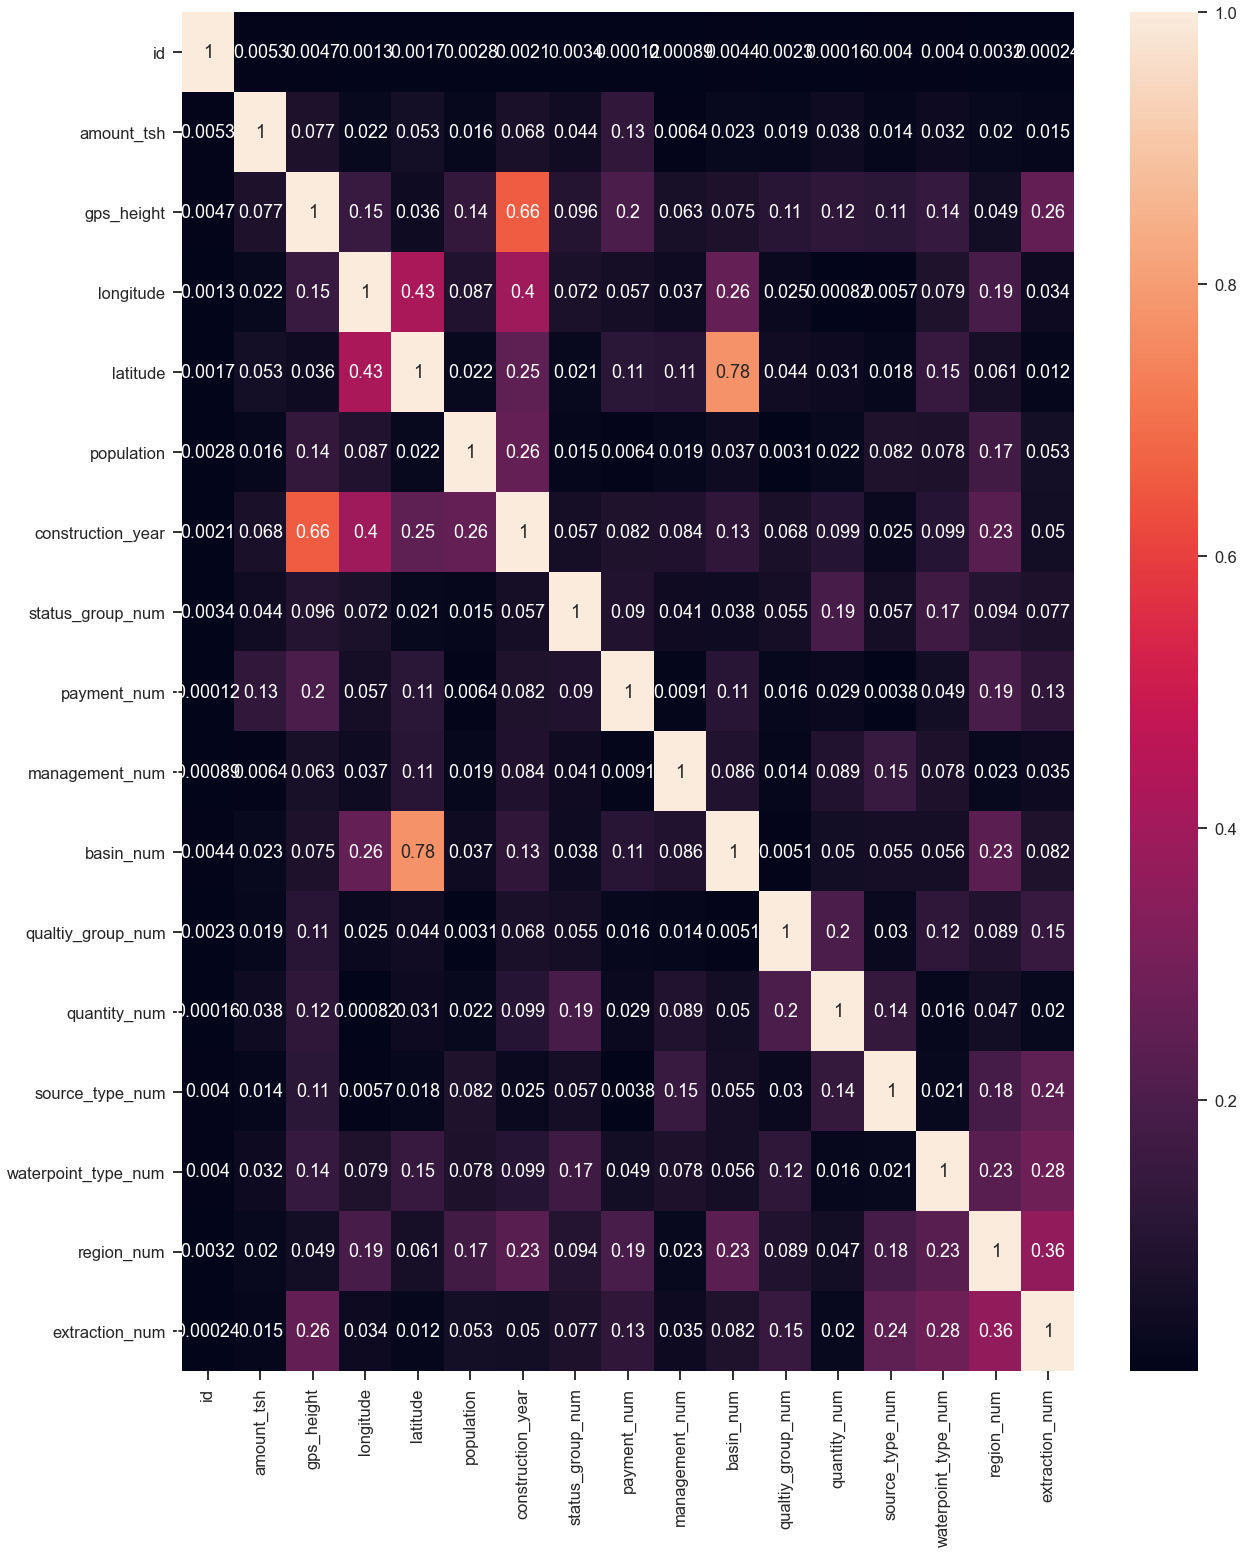

In [121]:
plt.figure(figsize=(20,25))
sns.heatmap(df2.corr().abs(), annot=True)
plt.show()

In [113]:
df2.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region', 'lga', 'ward',
       'population', 'permit', 'construction_year', 'extraction_type_class',
       'management', 'payment_type', 'quality_group', 'quantity',
       'source_type', 'waterpoint_type', 'status_group', 'status_group_num',
       'payment_num', 'management_num', 'basin_num', 'qualtiy_group_num',
       'quantity_num', 'source_type_num', 'waterpoint_type_num', 'region_num',
       'extraction_num'],
      dtype='object')

In [122]:
df3 = df2[['status_group_num', 'construction_year', 'qualtiy_group_num']]